In [230]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as pp
import math


In [231]:
# Reading CSV File and storing each individual column as arrays
df = pd.read_csv("justiceCentered.csv", encoding= 'unicode_escape')
issueArea = df["issueArea"]
justice = df["justice"]
vote = df["vote"]
direction = df["direction"]
# 102 - 117

In [232]:
# Creating a new dataframe based only on justice and direction
dataset = pd.DataFrame({'justice': justice, 'direction': direction})

justiceLeanings = []

# Find the average of each justice's votes - [1,2] where 1 is more conservative and 2 is more liberal
for area in range(1, 15):
    issueAreaLeanings = [] # issueAreaLeanings is the list for each issueArea
    dataset = pd.DataFrame({'justice': justice[issueArea == area], 'direction': direction[issueArea == area]})
    for i in range(102, 118):
        issueAreaLeanings.append(np.mean(dataset[dataset['justice'] == i])) # Adding each justice's mean leaning score to the issueAreaLeanings
    justiceLeanings.append(issueAreaLeanings)



In [233]:
# Initialize empty numpy arrays for the x-axis(justiceLabels) and the y-axis(justiceData)
arraySize = len(justiceLeanings[0]) 
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Initialize both arrays with the average values calculated in the cell prior
for i in range (0, 16):
    if (justiceLeanings[0][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[0][i]["direction"] # y axis
        justiceLabels[i] = justiceLeanings[0][i]["justice"] # x axis

# Perform a k-means clustering with 3 clusters (Chose 3 based on elbow method in cell below)

kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

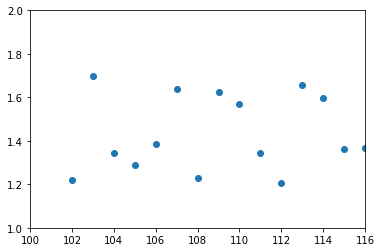

In [234]:
# Plotting unclustered data
plt.scatter(justiceLabels, justiceData)
plt.xlim(100, 116)
plt.ylim(1, 2)
plt.show()

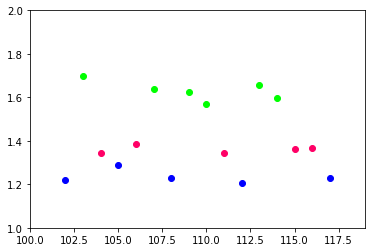

In [235]:
# Adding colors to the clustered data to show the clusters
colors=["#0000FF", "#00FF00", "#FF0066"]
fig = plt.figure()

plt.xlim(100, 119)
plt.ylim(1, 2)
for i in range(arraySize):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

In [236]:
# Elbow Method to find out the optimal number of clusters for this issue area
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

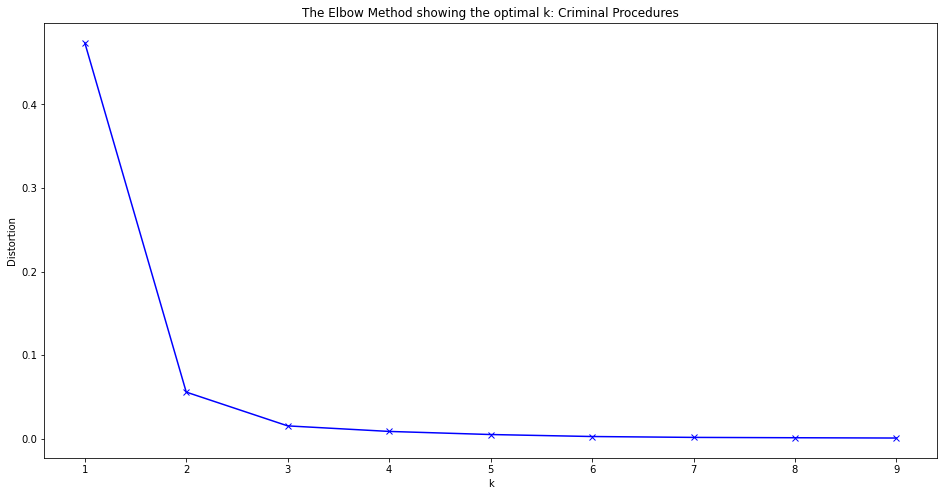

In [237]:
# Plotting elbow graph and subsequent analysis
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Criminal Procedures')
plt.show()


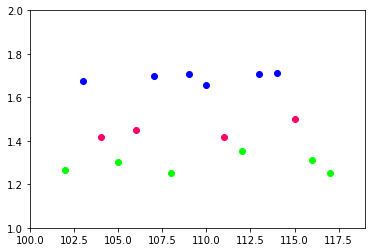

In [238]:
# Issue Area 2: Civil Rights

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[1])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 16):
    if (justiceLeanings[1][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[1][i]["direction"]
        justiceLabels[i] = justiceLeanings[1][i]["justice"]


# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066", "#FF8000"]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(100, 119)
plt.ylim(1, 2)
for i in range(arraySize):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

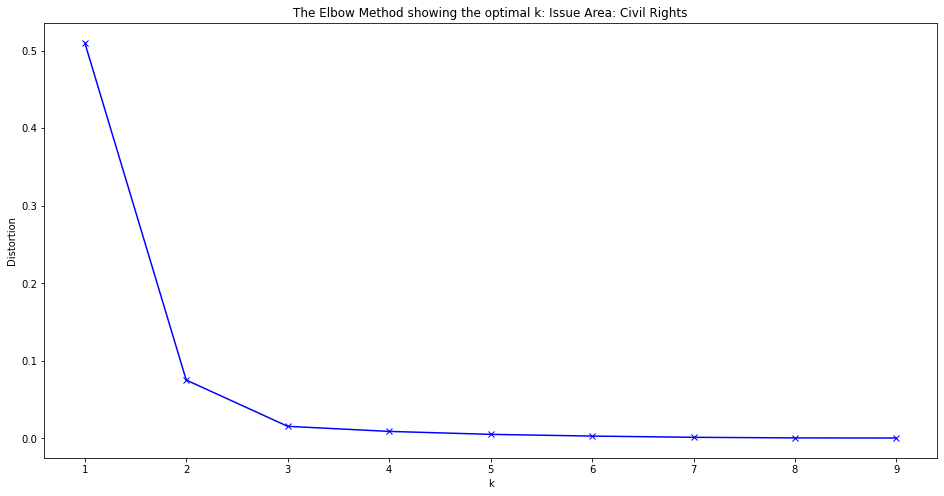

In [239]:
# Elbow Method for Issue 2: Civil Rights
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Civil Rights')
plt.show()

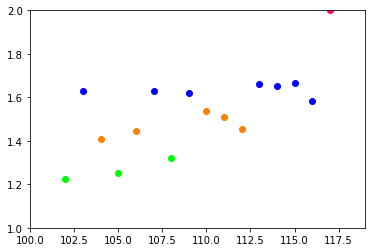

In [240]:
# Issue Area 3: First Amendment

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[2])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 16):
    if (justiceLeanings[2][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[2][i]["direction"]
        justiceLabels[i] = justiceLeanings[2][i]["justice"]

# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=4)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(100, 119)
plt.ylim(1, 2)
for i in range(arraySize):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

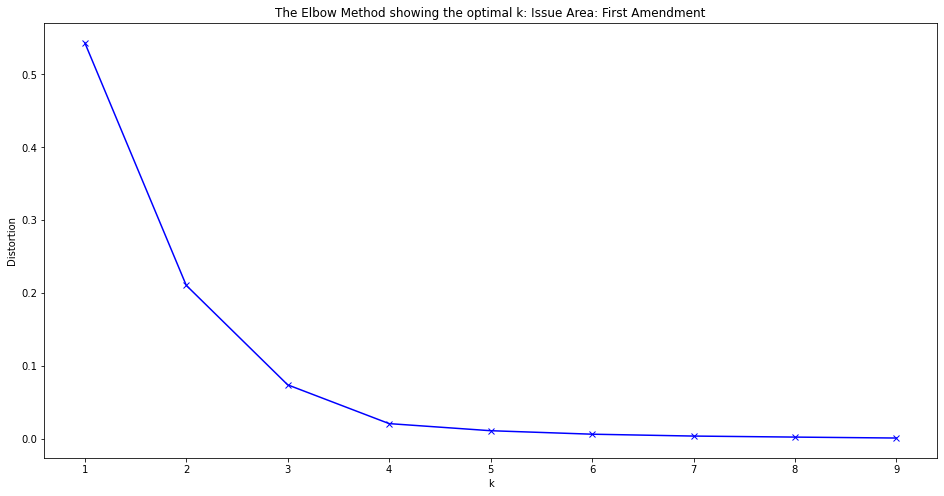

In [241]:
# Elbow Method for Issue 3: First Amendment; optimal clusters: 4
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: First Amendment')
plt.show()

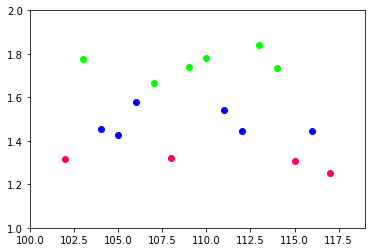

In [242]:
# Issue Area 4: Due Process

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[3])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 16):
    if (justiceLeanings[3][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[3][i]["direction"]
        justiceLabels[i] = justiceLeanings[3][i]["justice"]

# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(100, 119)
plt.ylim(1, 2)
for i in range(arraySize):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

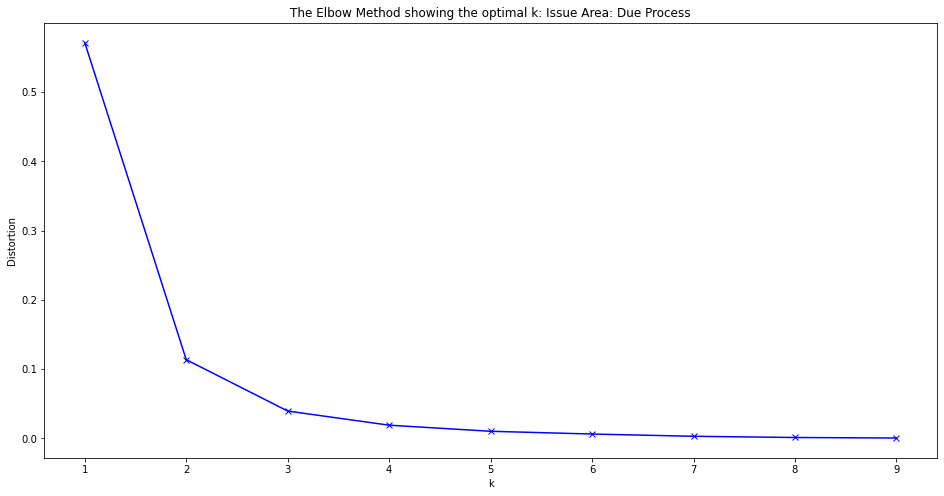

In [243]:
# Elbow Method for Issue 4: Due Process; optimal clusters: 3
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Due Process')
plt.show()

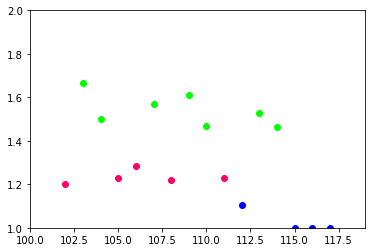

In [244]:
# Issue Area 5: Privacy -> 3 clusters

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[4])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 16):
    if (justiceLeanings[4][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[4][i]["direction"]
        justiceLabels[i] = justiceLeanings[4][i]["justice"]

# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(100, 119)
plt.ylim(1, 2)
for i in range(arraySize):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

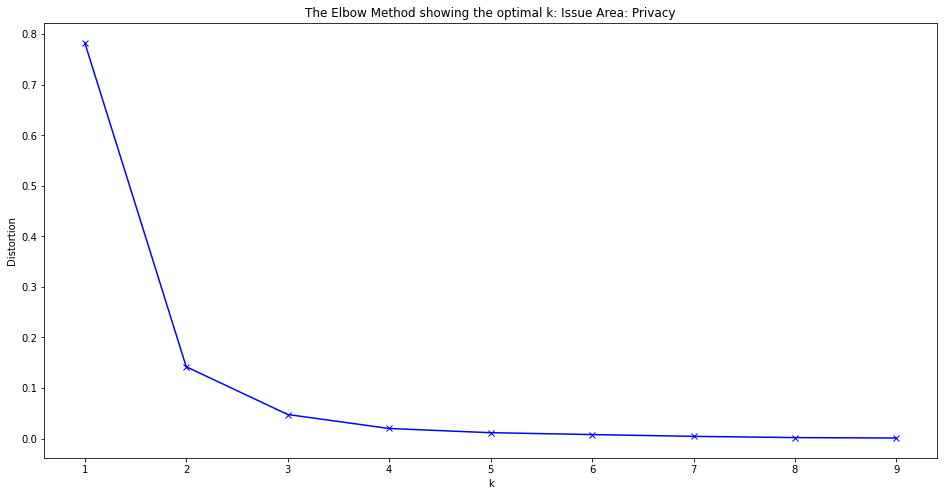

In [245]:
# Elbow Method for Issue 5: Privacy
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Privacy')
plt.show()

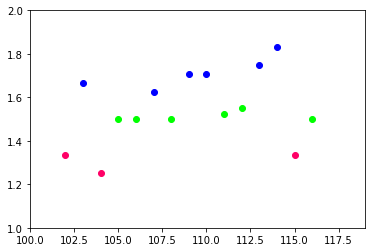

In [246]:
# Issue Area 6: Attorneys

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[5])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 16):
    if (justiceLeanings[5][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[5][i]["direction"]
        justiceLabels[i] = justiceLeanings[5][i]["justice"]

# Removing nan values from array (corresponds to justices who have never voted on this issue area)
justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]

# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(100, 119)
plt.ylim(1, 2)
for i in range(len(justiceData)):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()



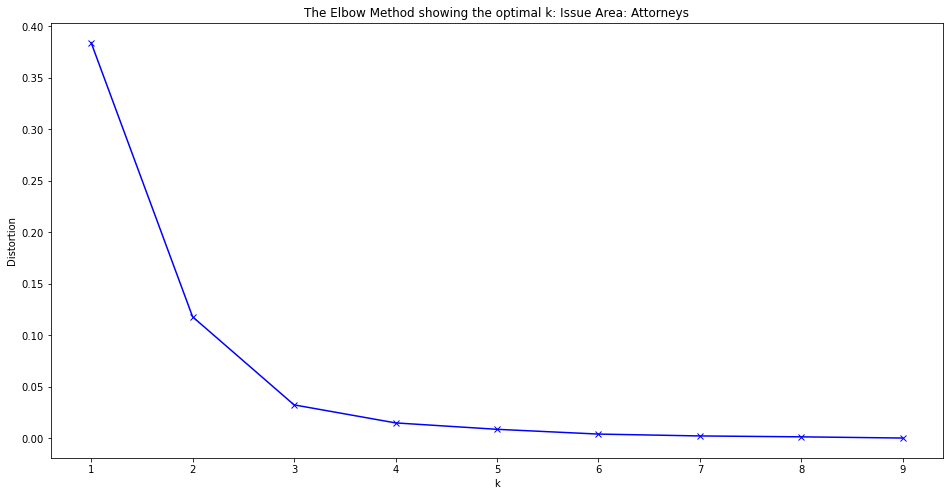

In [247]:
# Elbow Method for Issue 6: Attorneys - ideal is 3
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)
# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Attorneys')
plt.show()

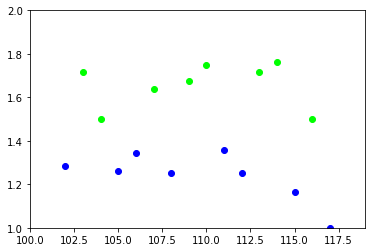

In [248]:
# Issue Area 7: Unions

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[6])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 16):
    if (justiceLeanings[6][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[6][i]["direction"]
        justiceLabels[i] = justiceLeanings[6][i]["justice"]

justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]

# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=2)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(100, 119)
plt.ylim(1, 2)
for i in range(len(justiceData)):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

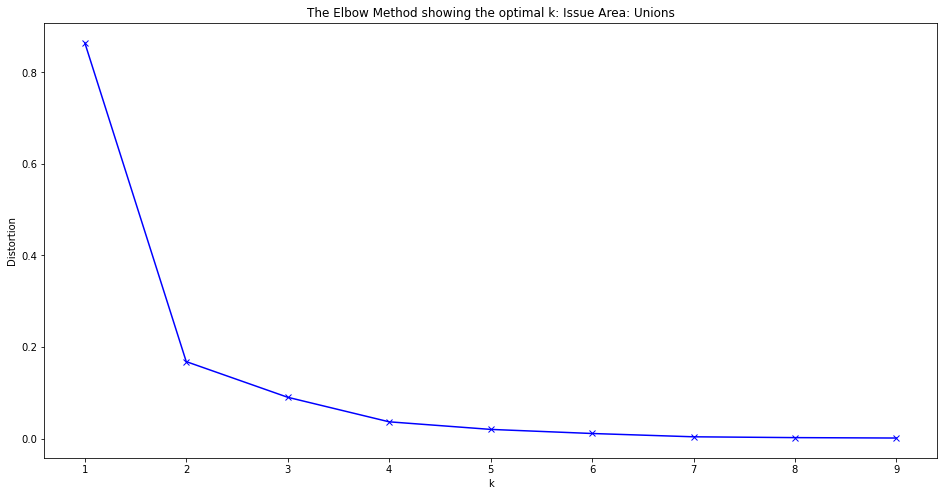

In [249]:
# Elbow Method for Issue 7: Unions - ideal is 2
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Unions')
plt.show()